In [33]:
import pandas as pd
import numpy as np
import statistics 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [34]:
path = Path('./')
df_meta = pd.read_csv(path / 'movie_meta.csv')
df_meta.set_index('id',inplace=True)
df_meta

,original_title,genres,budget,revenue,vote_average,vote_count
id,,,,,,
862,toy story,"['Animation', 'Comedy', 'Family']",30000000.0,373554033.0,7.7,5415.0
8844,jumanji,"['Adventure', 'Fantasy', 'Family']",65000000.0,262797249.0,6.9,2413.0
31357,waiting to exhale,"['Comedy', 'Drama', 'Romance']",16000000.0,81452156.0,6.1,34.0
949,heat,"['Action', 'Crime', 'Drama', 'Thriller']",60000000.0,187436818.0,7.7,1886.0
9091,sudden death,"['Action', 'Adventure', 'Thriller']",35000000.0,64350171.0,5.5,174.0
...,...,...,...,...,...,...
24049,சிவாஜி,"['Action', 'Comedy', 'Drama']",12000000.0,19000000.0,6.9,25.0
280422,все и сразу,"['Crime', 'Comedy']",750000.0,3.0,6.0,4.0
62757,dikari,"['Comedy', 'Drama']",800000.0,1328612.0,5.8,6.0


In [35]:
df_meta.explode('genres')

,original_title,genres,budget,revenue,vote_average,vote_count
id,,,,,,
862,toy story,"['Animation', 'Comedy', 'Family']",30000000.0,373554033.0,7.7,5415.0
8844,jumanji,"['Adventure', 'Fantasy', 'Family']",65000000.0,262797249.0,6.9,2413.0
31357,waiting to exhale,"['Comedy', 'Drama', 'Romance']",16000000.0,81452156.0,6.1,34.0
949,heat,"['Action', 'Crime', 'Drama', 'Thriller']",60000000.0,187436818.0,7.7,1886.0
9091,sudden death,"['Action', 'Adventure', 'Thriller']",35000000.0,64350171.0,5.5,174.0
...,...,...,...,...,...,...
24049,சிவாஜி,"['Action', 'Comedy', 'Drama']",12000000.0,19000000.0,6.9,25.0
280422,все и сразу,"['Crime', 'Comedy']",750000.0,3.0,6.0,4.0
62757,dikari,"['Comedy', 'Drama']",800000.0,1328612.0,5.8,6.0


In [36]:
df_meta.genres = df_meta.genres.apply(eval)
genres = df_meta.genres.apply(lambda x: x[0]).unique()
genres,genres.shape

(array(['Animation', 'Adventure', 'Comedy', 'Action', 'History', 'Drama',
        'Crime', 'Fantasy', 'Science Fiction', 'Horror', 'Romance',
        'Mystery', 'Thriller', 'Documentary', 'Family', 'War', 'Western',
        'Music', 'TV Movie', 'Foreign'], dtype=object),
 (20,))

In [37]:


def plot_avg_budget_revenue(df_x):
    # Explode the genres list to create separate rows for each genre
    df_exploded = df_x.explode('genres')

    # Calculate mean budget and revenue for each genre
    genre_stats = df_exploded.groupby('genres').agg({
        'budget': 'mean',
        'revenue': 'mean'
    }).reset_index()

    # Create a bar plot
    plt.figure(figsize=(10, 4))
    x = np.arange(len(genre_stats))
    width = 0.35

    plt.bar(x - width/2, genre_stats['budget'], width, label='Budget', color='skyblue')
    plt.bar(x + width/2, genre_stats['revenue'], width, label='Revenue', color='lightgreen')

    plt.xlabel('Genres')
    plt.ylabel('Amount ($)')
    plt.title('Average Budget vs Revenue by Genre')
    plt.xticks(x, genre_stats['genres'], rotation=45, ha='right')
    plt.legend()

    # Format y-axis to millions
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}M' if x >= 1e6 else f'${x:,.0f}'))

    plt.tight_layout()
    plt.show()


In [38]:
def plot_avg_vote_by_genre(df_x):
    # Explode the genres list to create separate rows for each genre
    df_exploded = df_x.explode('genres')

    # Calculate mean vote_average for each genre
    genre_stats = df_exploded.groupby('genres').agg({
        'vote_average': 'mean'
    }).reset_index()

    # Create a bar plot
    plt.figure(figsize=(10, 4))
    x = np.arange(len(genre_stats))
    width = 0.35

    plt.bar(x, genre_stats['vote_average'], width, color='skyblue')

    plt.xlabel('Genres')
    plt.ylabel('Average Vote Rating')
    plt.title('Average Vote Rating by Genre')
    plt.xticks(x, genre_stats['genres'], rotation=45, ha='right')

    # Add value labels on top of each bar
    for i, v in enumerate(genre_stats['vote_average']):
        plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

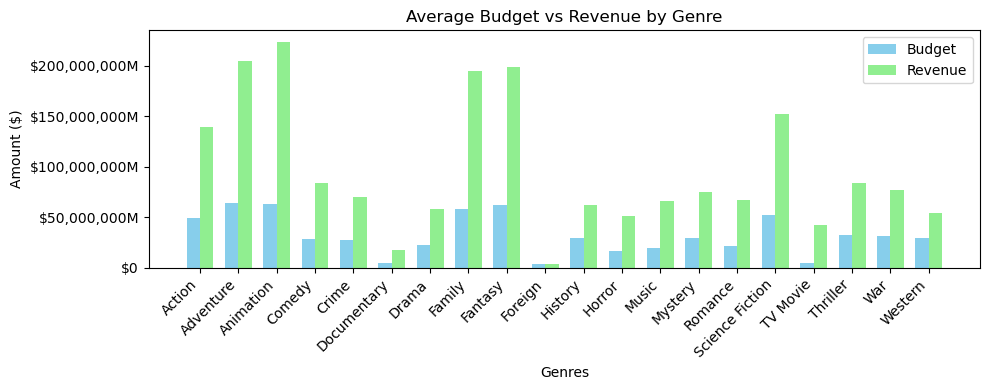

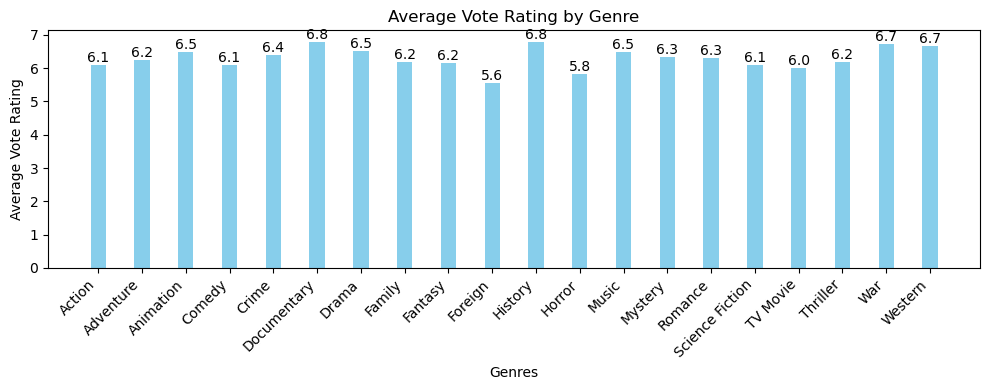

In [39]:
plot_avg_budget_revenue(df_meta)
plot_avg_vote_by_genre(df_meta)

# Central Limited Theeorem

In [40]:
# Demonstrate Central Limit Theorem by plotting distribution of sample means
n_bootstraps = 1000  # Increase number of samples for better demonstration
sample_size = 500    # Size of each sample
budget_means = []
revenue_means = []
vote_averages_means = []

# Generate multiple sample means
for i in range(n_bootstraps):
    # Take random sample and calculate mean budget and revenue for each genre
    sample = df_meta.sample(n=sample_size, replace=True)
    sample_means_budget = sample.explode('genres').groupby('genres')['budget'].mean()
    sample_means_revenue = sample.explode('genres').groupby('genres')['revenue'].mean()
    sample_means_vote_avg = sample.explode('genres').groupby('genres')['vote_average'].mean()
    budget_means.append(sample_means_budget)
    revenue_means.append(sample_means_revenue)
    vote_averages_means.append(sample_means_vote_avg)

# Convert lists to DataFrames
budget_means_df = pd.DataFrame(budget_means)
revenue_means_df = pd.DataFrame(revenue_means)
vote_averages_means_df = pd.DataFrame(vote_averages_means)




In [41]:
budget_means_df.fillna(0,inplace=True)
revenue_means_df.fillna(0,inplace=True)
vote_averages_means_df.fillna(0,inplace=True)

In [42]:
def plot_samples_genre_mean(df_meta,budget_means_df, revenue_means_df):
    # Calculate number of plots needed
    n_genres = len(budget_means_df.columns)
    n_plots = (n_genres + 9) // 10  # Round up to nearest multiple of 5
    
    # Get actual means from original df_meta for comparison
    actual_means = df_meta.explode('genres').groupby('genres').agg({
        'budget': 'mean',
        'revenue': 'mean'
    })
    
    # Plot histograms of sample means for each genre in groups of 5
    for i in range(n_plots):
        start_idx = i * 10
        end_idx = min(start_idx + 10, n_genres)
        
        fig, axes = plt.subplots(1, end_idx - start_idx, figsize=(40, 5))
        if end_idx - start_idx == 1:
            axes = [axes]  # Make axes iterable when only one subplot
            
        for idx, genre in enumerate(budget_means_df.columns[start_idx:end_idx]):
            # Budget histogram
            axes[idx].hist(budget_means_df[genre].dropna(), bins=30, density=True, alpha=0.5, color='skyblue', label='Sample Budget Distribution')
            axes[idx].axvline(actual_means.loc[genre, 'budget'], color='blue', linestyle='--', label='Actual Budget Mean')
            
            # Revenue histogram
            axes[idx].hist(revenue_means_df[genre].dropna(), bins=30, density=True, alpha=0.5, color='lightgreen', label='Sample Revenue Distribution')
            axes[idx].axvline(actual_means.loc[genre, 'revenue'], color='green', linestyle='--', label='Actual Revenue Mean')
            
            axes[idx].set_title(f'{genre}\nSample Mean Budget=${budget_means_df[genre].mean():,.0f}\n'
                               f'Sample Mean Revenue=${revenue_means_df[genre].mean():,.0f}\n'
                               f'Actual Mean Budget=${actual_means.loc[genre,"budget"]:,.0f}\n'
                               f'Actual Mean Revenue=${actual_means.loc[genre,"revenue"]:,.0f}')
            axes[idx].set_xlabel('Amount ($)')
            axes[idx].set_ylabel('Density')
            axes[idx].legend()
        
        plt.tight_layout()
        plt.show()
 

In [43]:
def plot_samples_genre_mean_vote(df_meta, vote_averages_means_df):
    # Calculate number of plots needed
    n_genres = len(vote_averages_means_df.columns)
    n_plots = (n_genres + 9) // 10  # Round up to nearest multiple of 5
    
    # Get actual means from original df_meta for comparison
    actual_means = df_meta.explode('genres').groupby('genres').agg({
        'vote_average': 'mean'
    })
    
    # Plot histograms of sample means for each genre in groups of 5
    for i in range(n_plots):
        start_idx = i * 10
        end_idx = min(start_idx + 10, n_genres)
        
        fig, axes = plt.subplots(1, end_idx - start_idx, figsize=(40, 5))
        if end_idx - start_idx == 1:
            axes = [axes]  # Make axes iterable when only one subplot
            
        for idx, genre in enumerate(vote_averages_means_df.columns[start_idx:end_idx]):
            # Vote average histogram
            axes[idx].hist(vote_averages_means_df[genre].dropna(), bins=30, density=True, alpha=0.5, color='lightpink', label='Sample Vote Average Distribution')
            axes[idx].axvline(actual_means.loc[genre, 'vote_average'], color='red', linestyle='--', label='Actual Vote Average Mean')
            
            axes[idx].set_title(f'{genre}\nSample Mean Vote={vote_averages_means_df[genre].mean():.1f}\n'
                               f'Actual Mean Vote={actual_means.loc[genre,"vote_average"]:.1f}')
            axes[idx].set_xlabel('Vote Score')
            axes[idx].set_ylabel('Density')
            axes[idx].legend()
        
        plt.tight_layout()
        plt.show()

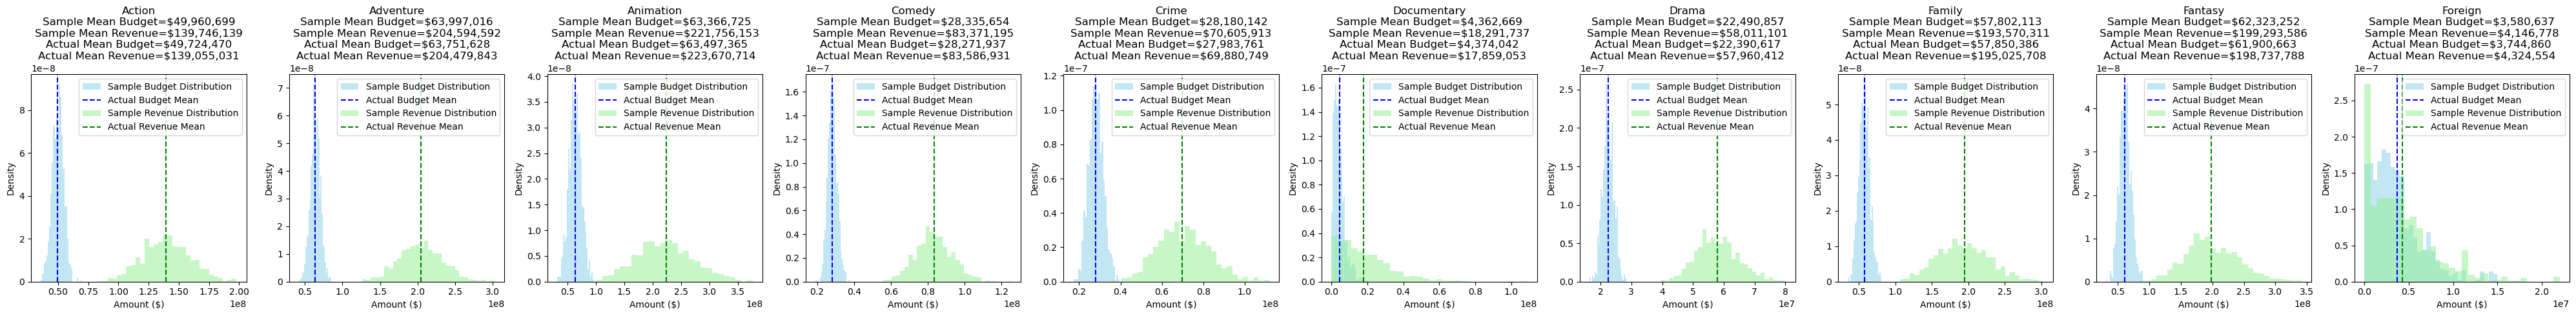

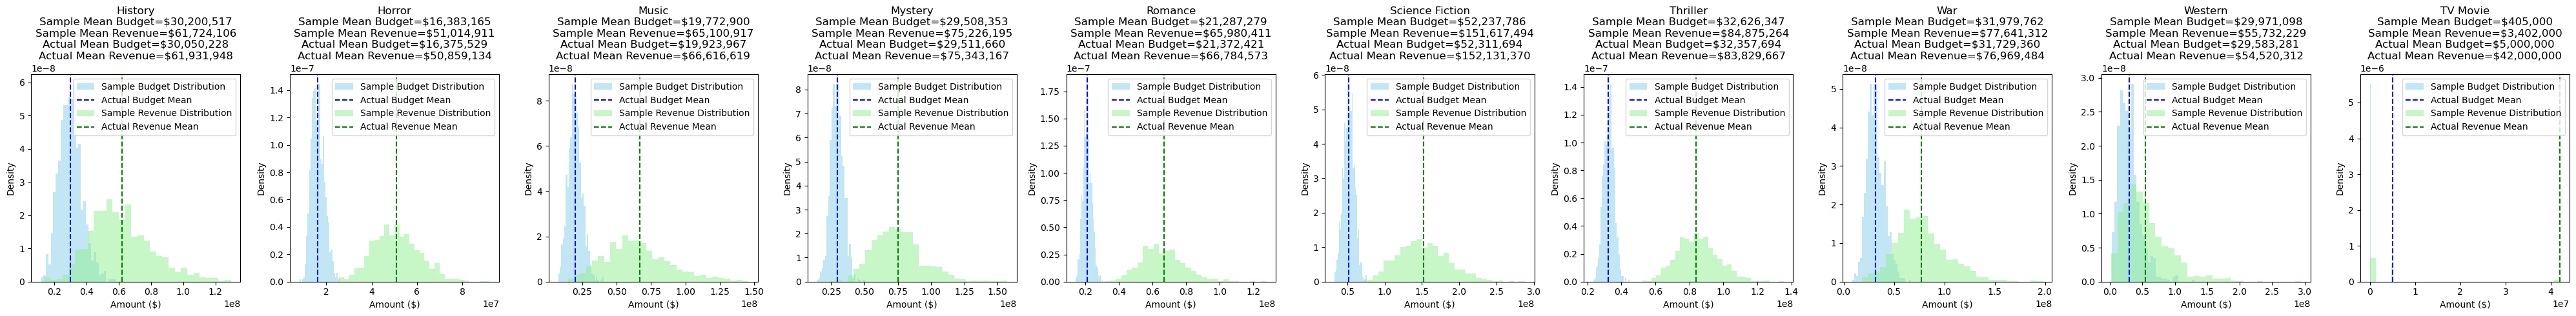

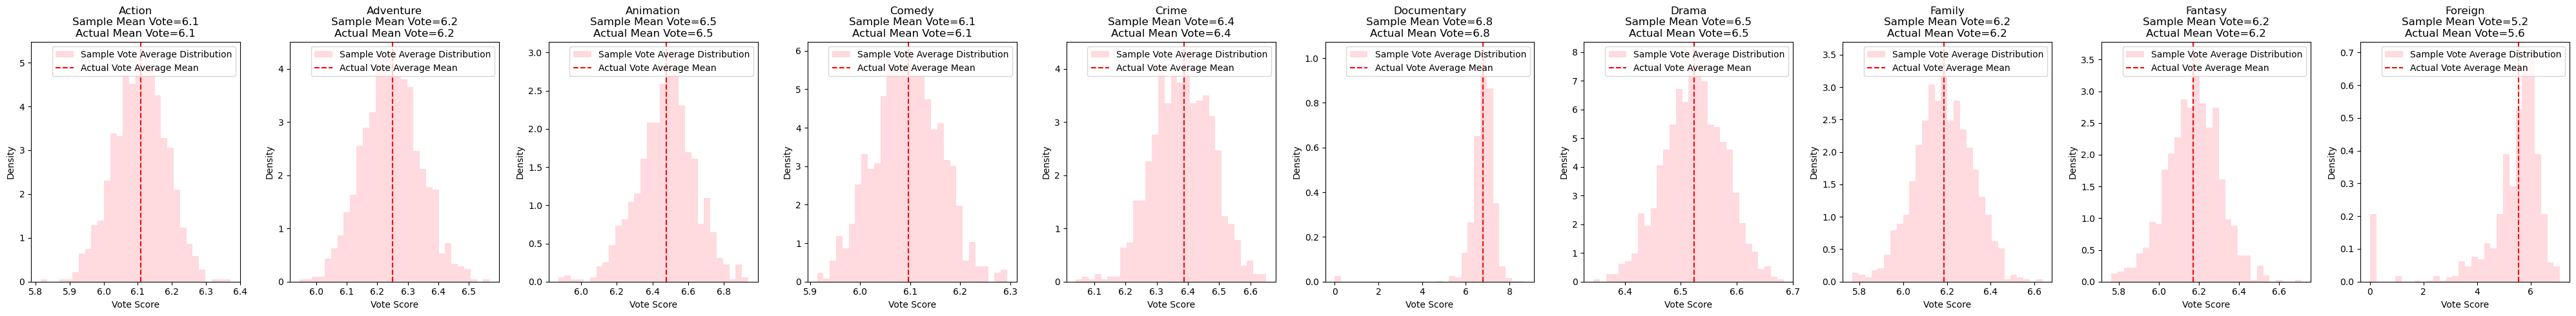

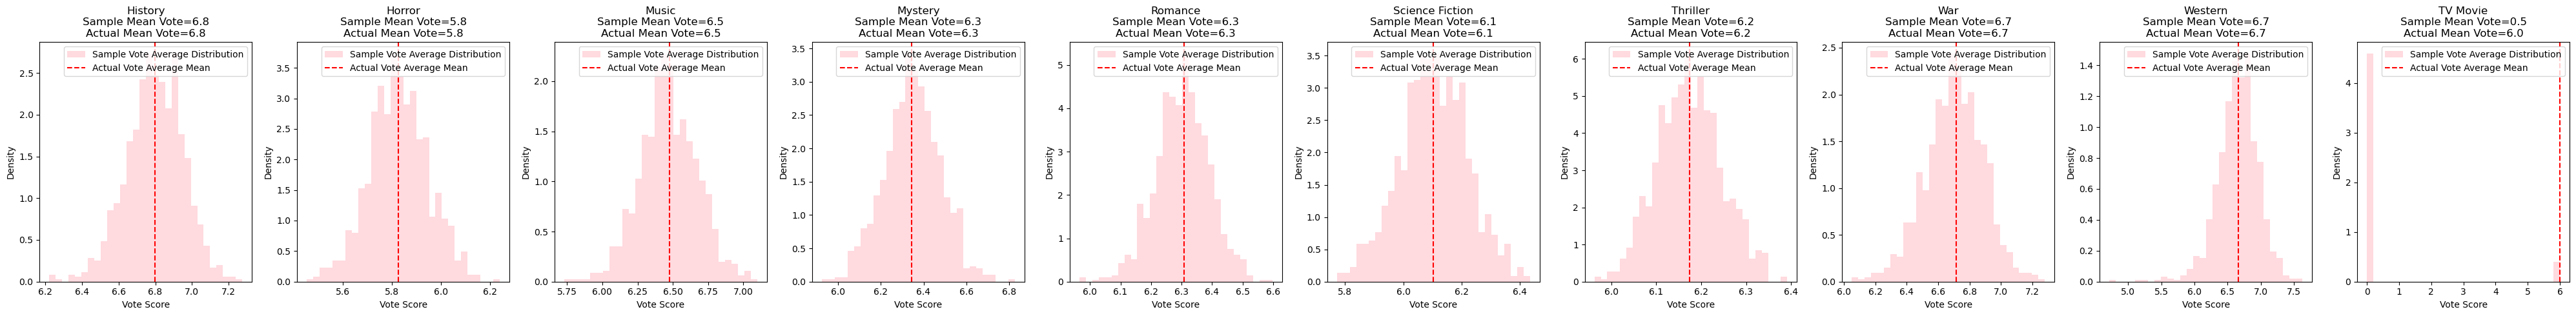

In [44]:
plot_samples_genre_mean(df_meta,budget_means_df,revenue_means_df)
plot_samples_genre_mean_vote(df_meta, vote_averages_means_df)